# Graph Search 1

- Depth First Search (Stack)
- Breadth First Search (Queue)

In [ ]:
# known import statements
from graphviz import Digraph
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

# new import statements


### Depth First Search (DFS) 
- Few lectures ago: BST search with complexity **O(logN)**
- Finds a path from one node to another -- works on any directed graph

In [ ]:
def example(num):
    g = Graph()
    if num == 1:
        g.node("A")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "B")
    elif num == 2:
        g.edge("A", "B")
        g.edge("B", "C")
        g.edge("C", "D")
        g.edge("D", "E")
        g.edge("A", "E")
    elif num == 3:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
    elif num == 4:
        g.edge("A", "B")
        g.edge("A", "C")
        g.edge("B", "D")
        g.edge("B", "E")
        g.edge("C", "F")
        g.edge("C", "G")
        g.edge("E", "Z")
        g.edge("C", "Z")
        g.edge("B", "A")
    elif num == 5:
        width = 8
        height = 4
        for L1 in range(height-1):
            L2 = L1 + 1
            for i in range(width-(height-L1-1)):
                for j in range(width-(height-L2-1)):
                    node1 = str(L1)+"-"+str(i)
                    node2 = str(L2)+"-"+str(j)
                    g.edge(node1, node2)
    else:
        raise Exception("no such example")
    return g

### For a regular graph, you need a new class `Graph` to keep track of the whole graph.
- Why? Remember graphs need not have a "root" node, which means there is no one origin point

In [ ]:
class Graph:
    def __init__(self):
        # name => Node
        self.nodes = {}
        # to keep track which nodes have already been visited
        self.visited = set()

    def node(self, name):
        node = Node(name)
        self.nodes[name] = node
        node.graph = self
    
    def edge(self, src, dst):
        """
        Automatically adds missing nodes.
        """
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        """
        Draws the graph nodes and edges iteratively.
        """
        g = Digraph()
        for n in self.nodes:
            g.node(n)
            for child in self.nodes[n].children:
                g.edge(n, child.name)
        return g._repr_image_svg_xml()
    
    def dfs_search(self, src_name, dst_name):
        """
        Clears the visited set and invokes dfs_search using Node object instance
        with name src_name.
        """
        # Q: is this method recursive?
        # A: no, it is just invoking dfs_search method for Node object instance
        #    dfs_search method in Node class is recursive
        #    These methods in two different classes just happen to share the same name
        self.visited.clear()
        return self.nodes[src_name].dfs_search(self.nodes[dst_name])
    
    def bfs_search(self, src_name, dst_name):
        """
        Invokes bfs_search using Node object instance with name src_name.
        """
        return self.nodes[src_name].bfs_search(self.nodes[dst_name])

class Node:
    def __init__(self, name):
        self.name = name
        self.children = []
        self.graph = None # back reference
        self.finder = None # who found me during BFS
        
    def __repr__(self):
        return self.name
    
    def dfs_search_v1(self, dst):
        """
        Returns True / False when path to dst is found / not found
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return False
        self.graph.visited.add(self)

        if self == dst:
            return True
        
        for child in self.children:
            if child.dfs_search_v1(dst):
                return True
            
        return False

    def dfs_search(self, dst):
        """
        Returns the actual path to the dst as a tuple or None otherwise
        """
        # TODO: what is the simplest case? current node is the dst
        if self in self.graph.visited:
            return None
        self.graph.visited.add(self)

        if self == dst:
            return (self,)
        
        for child in self.children:
            child_path = child.dfs_search(dst)
            if child_path != None:
                return (self,) + child_path
            
        return None
    
    def bfs_search_v1(self, dst):
        """
        Returns True / False when path to dst is found / not found.
        Iterative / non recursive method.
        """
        to_visit = [self]
        
        while len(to_visit) > 0:
            curr_node = to_visit.pop(0)
            if curr_node == dst:
                return True
            
            for child in curr_node.children:
                if child not in added:
                    to_visit.append(child)
                                    
        return False

g = example(1)
g

### Testcases for DFS

In [ ]:
g

In [ ]:
print(g.dfs_search("B", "A")) # should return None
print(g.dfs_search("B", "D")) # should return (B, C, D)

### Why is it called "*Depth* First Search"?

- we start at the starting node and go as deep as possible because recursion always goes as deep as possible before coming back to the other children in the previous level
- we need a `Stack` data structure:
    - Last-In-First-Out (LIFO)
- recursion naturally uses `Stack`, which is why we don't have to explicitly use a `Stack` data structure
- might not give us the shortest possible path

In [ ]:
g = example(2)
g

In [ ]:
print(g.dfs_search("A", "E")) # should return (A, B, C, D, E)
print(g.dfs_search("E", "A")) # should return None

### Breadth first search

- find the shortest path by exploring all children first before the grandchildren or any of the successors
- we need a `Queue` data structure:
    - First-In-First-Out (FIFO)
- unlike DFS, BFS gives us the shortest possible path

In [ ]:
# TODO: let's define bfs_search method

In [ ]:
g = example(3)
g

In [ ]:
print(g.bfs_search("A", "D"))

In [ ]:
g = example(2)
g

In [ ]:
print(g.bfs_search("A", "E"))

In [ ]:
g = example(1)
g

In [ ]:
print(g.bfs_search("B", "D")) # should return (B, C, D)

In [ ]:
print(g.bfs_search("B", "A")) # should return None
# what's wrong?

### How do we find the path using BFS?

In [ ]:
g = example(3)
print(g.bfs_search("A", "E"))
g

In [ ]:
g.nodes["E"]

In [ ]:
# TODO: let's go back and implement a backtrace method to help us trace back this path

### BFS complexity

- focus on the data structures that we use and identify the single line of code that is a slow operation
- Assuming N nodes in the directed graph, what will the current algorithm's complexity be? 
    - `O(N**2)`
    - Why? to_visit.pop(0) will be O(N) operation because we need to slide the list items over every time we remove the first item
    
- Can we make this algorithm better by using a different data structure than a list?

### Queueing Structures

- Stack:
    - First-In-Last-Out(FILO) or Last-In-First-Out(LIFO)
- Queue:
    - First-In-First-Out (FIFO)
- Priority Queue:
    - Highest priority item is kept first always

<div>
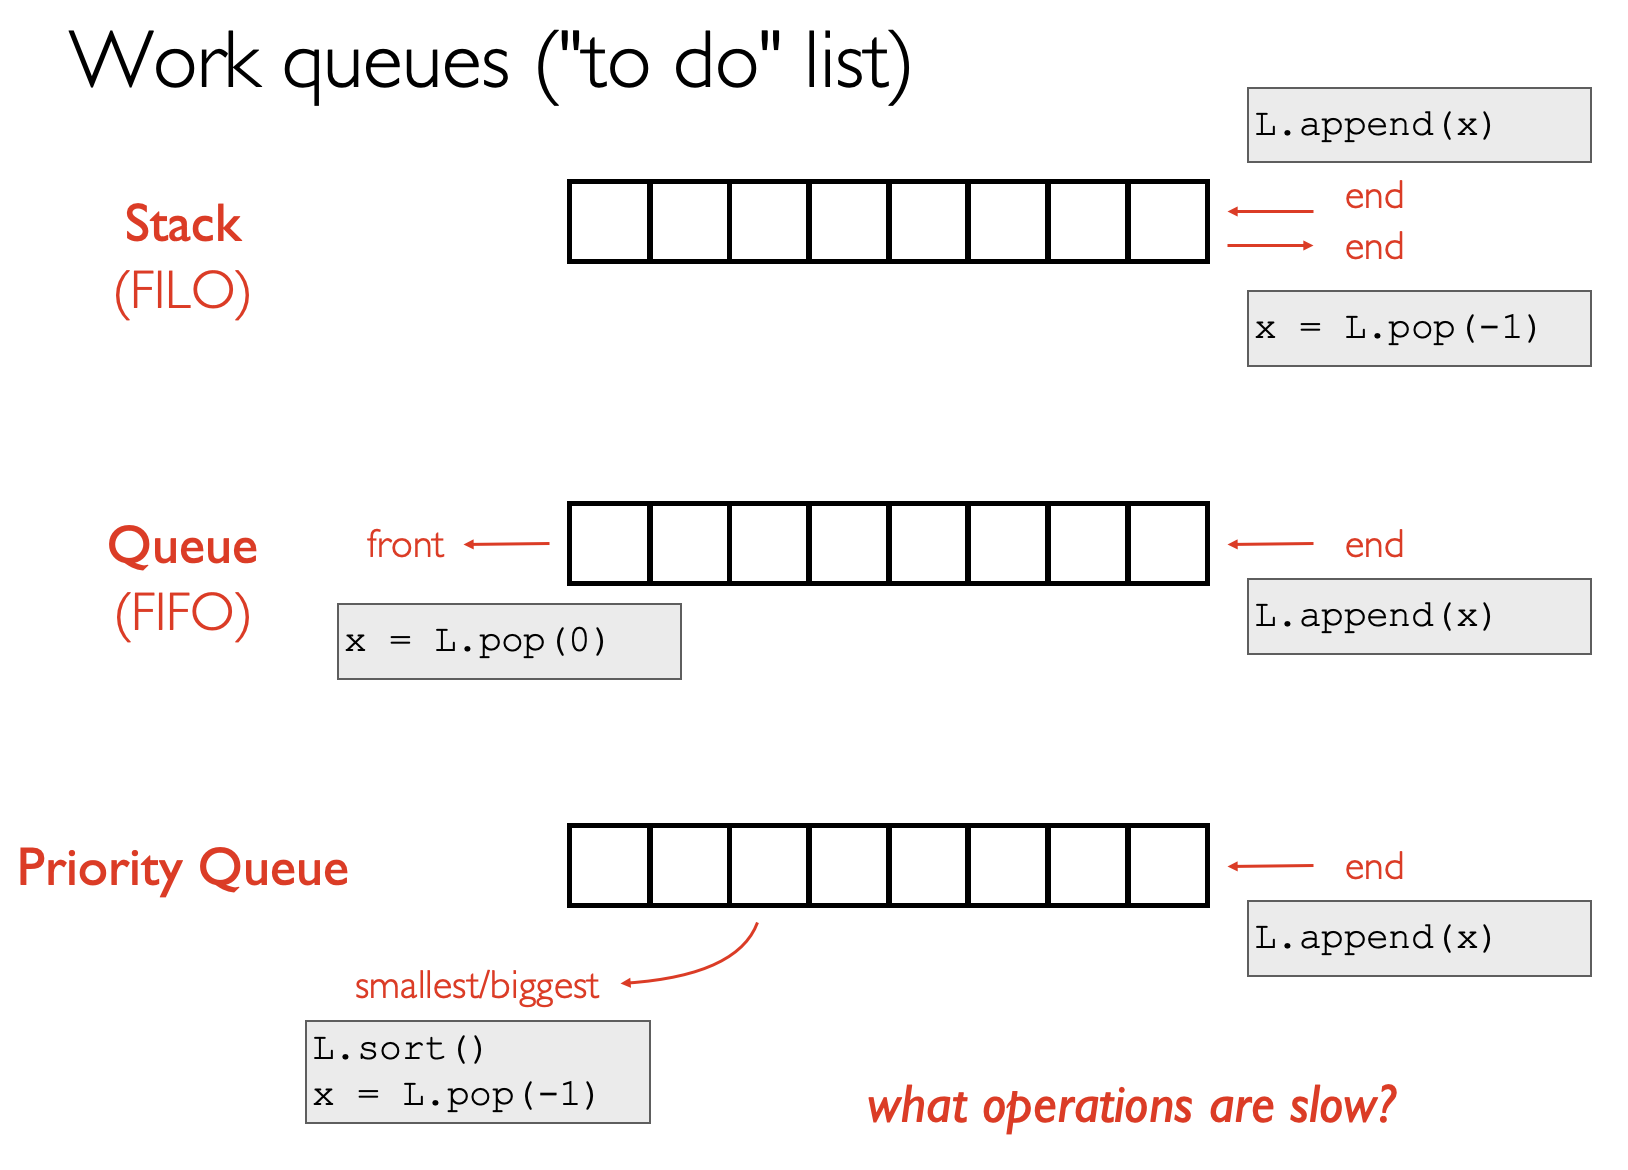
</div>

Slow operations:
- `x = L.pop(0)`
- `L.sort()`

### Using `deque` to improve "BFS" complexity

- Documentation: https://docs.python.org/3/library/collections.html#collections.deque
- Search for "O(" in the documentation to get a sense of complexity of various operations. Here are a few highlights:
    - memory efficient appends and pops from either side of the deque with approximately the same **O(1)** performance in either direction
    - Indexed access is O(1) at both ends but slows to O(n) in the middle. For fast random access, use lists instead.
    
- Operations:
    - `collections.deque([iterable[, maxlen]])`
    - `append(x)` ---> **O(1)** operation, equally efficient when compared to list's **O(1)** for adding item at the end
    - `popleft()` ---> **O(1)** operation, highly efficient when compared to list's **O(N)** for popping item at index 0

What are some examples of `iterable`? `list`, `str`, `range(...)`, `dict`, basically anything that can be iterated using a `for` loop.

Create a deque by passing a list with 3 items as argument.

In [ ]:
d = ???
d

Append a new item to your deque.

In [ ]:

d

Pop the item at index 0 using `popleft`.

In [ ]:
item = ???
print(item, d)

### Go back to `bfs_search` and update our `to_visit` list usage to use a `deque` instead

In [ ]:
# TODO: update bfs_search to make the implementation efficient

### What if we wanted to explore nodes in a different order other than `DFS` and `BFS` ordering? 

<div>
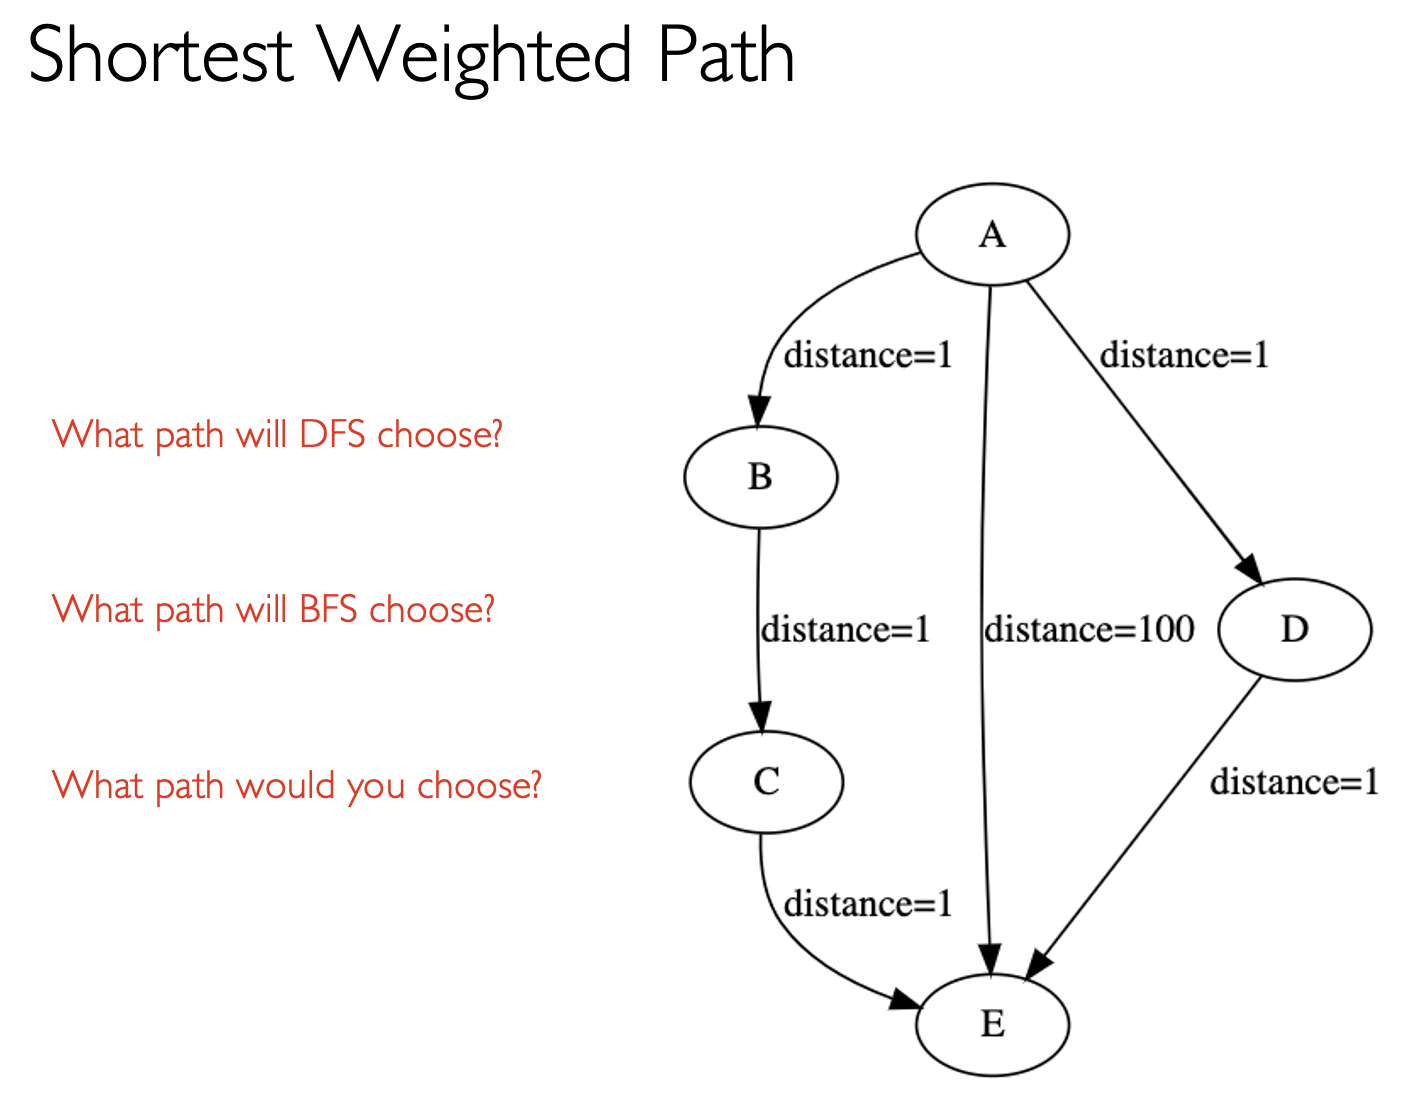
</div>

### Using `heapq` (priority queue)

<div>
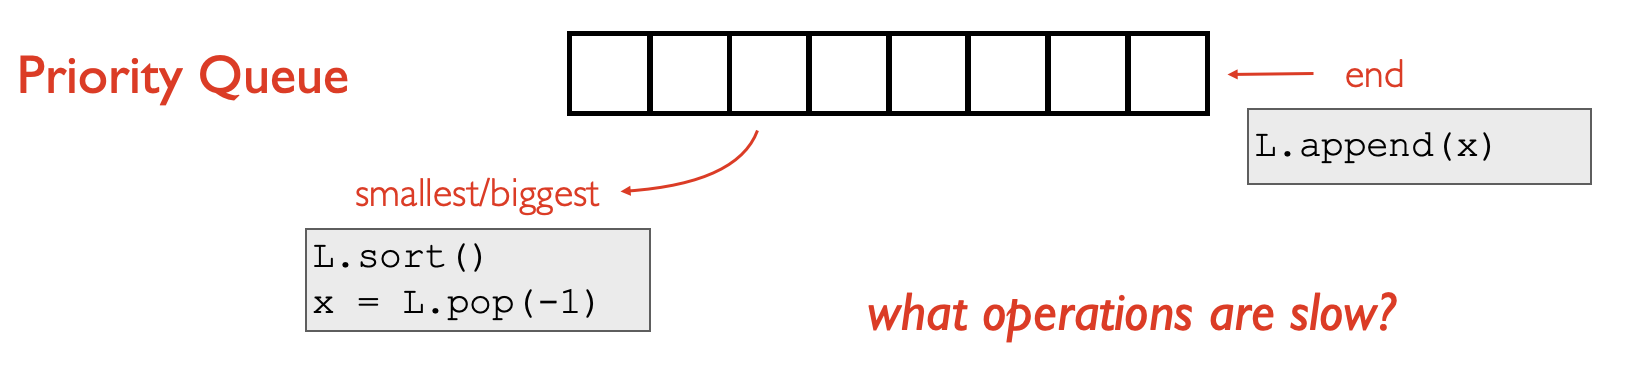
</div>

**IMPORTANT**: Unlike `deque`, `heapq` is not a type by itself.

- Operations:
    - `heapq.heappush(LIST, VAL)`:
        - adds VAL to the list
        - shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)
    - `val = heapq.heappop(LIST)`
        - removes the smallest item from the list
        - re-shuffles around the values so that the smallest value is in the front
        - does so in **O(log N)** time (so it is not sorting, but just shuffling)

In [ ]:
data = []
vals = [5, 3, 1, 4, 2]


### Benchmarking `stack`, `queue`, and `priority queue` for performance

In [ ]:
iters = 1000

def benchmark_microsec(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using a list data structure
    """
    t0 = time.time()
    # measure bad ways to implement the patterns (all with a list!)
    for i in range(iters):
        if pattern == "stack":
            data.append(i % 10)
            _ = data.pop(-1)
        elif pattern == "queue":
            pass
            # TODO: complete the code for queue
        elif pattern == "prio queue":
            pass
            # TODO: complete the code for priority queue
        else:
            raise Exception("pattern not supported")
    t1 = time.time()
    return (t1-t0) / iters * 1e6

df = pd.DataFrame()
for N in [1000,2000,5000,10000]:
    df.loc[N,"stack"] = benchmark_microsec([1]*N, "stack")

plt.rcParams["font.size"] = 16
df.plot.line(ylim=0)
plt.xlabel("N")
plt.ylabel("Microseconds")
df

In [ ]:
def benchmark_microsec_v2(data, pattern):
    """
    Benchmarking "stack", "queue", "priority queue" 
    implementations using list, deque, and heapq list data structures
    """
